In [2]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import env

# DBSCAN import
from sklearn.cluster import DBSCAN
# Scaler import
from sklearn.preprocessing import MinMaxScaler

In [3]:
def get_connection(db, user=env.user, host=env.host, password=env.password):
    '''
    function to generate a url for querying the codeup database
    accepts a database name (string) and requires an env.py file with 
    username, host, and password.

    Returns an url as a string  
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'



 

In [4]:
df = pd.read_sql('''
                SELECT * FROM grocery_customers
                    ''', get_connection('grocery_db'))

In [8]:
df.head()

,customer_id,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0,2,3,12669,9656,7561,214,2674,1338
1,1,2,3,7057,9810,9568,1762,3293,1776
2,2,2,3,6353,8808,7684,2405,3516,7844
3,3,1,3,13265,1196,4221,6404,507,1788
4,4,2,3,22615,5410,7198,3915,1777,5185


In [10]:
df.set_index('customer_id')

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
customer_id,,,,,,,,
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867


In [12]:
df.columns = df.columns.str.lower()

In [16]:
channel_region_grocery = df[['channel', 'region', 'grocery']]

In [29]:
scaler = MinMaxScaler()
scaler.fit(channel_region_grocery)
scaled_crg = scaler.transform(channel_region_grocery)
scaled_crg

array([[1.        , 1.        , 0.08146416],
       [1.        , 1.        , 0.10309667],
       [1.        , 1.        , 0.08278992],
       ...,
       [1.        , 1.        , 0.32594285],
       [0.        , 1.        , 0.02402535],
       [0.        , 1.        , 0.02702178]])

In [44]:
dbsc = DBSCAN(eps=.1,min_samples=20)
dbsc.fit(scaled_crg)

DBSCAN(eps=0.1, min_samples=20)

In [41]:
cols = ['channel', 'region', 'grocery']
scaled_cols = ['scaled_' + col for col in cols]
scaled_df = pd.DataFrame(scaled_crg, columns=scaled_cols)

df = pd.concat([df, scaled_df], axis=1)


In [42]:
df

,channel,region,fresh,milk,grocery,frozen,detergents_paper,delicassen,scaled_channel,scaled_region,scaled_grocery
0,2,3,12669,9656,7561,214,2674,1338,1.0,1.0,0.081464
1,2,3,7057,9810,9568,1762,3293,1776,1.0,1.0,0.103097
2,2,3,6353,8808,7684,2405,3516,7844,1.0,1.0,0.082790
3,1,3,13265,1196,4221,6404,507,1788,0.0,1.0,0.045464
4,2,3,22615,5410,7198,3915,1777,5185,1.0,1.0,0.077552
...,...,...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,0.0,1.0,0.172715
436,1,3,39228,1431,764,4510,93,2346,0.0,1.0,0.008202
437,2,3,14531,15488,30243,437,14841,1867,1.0,1.0,0.325943
438,1,3,10290,1981,2232,1038,168,2125,0.0,1.0,0.024025


In [46]:
df['labels'] = dbsc.labels_
df.labels.value_counts()

 1    211
 0    101
 2     59
-1     41
 3     28
Name: labels, dtype: int64

<AxesSubplot:xlabel='channel', ylabel='region'>

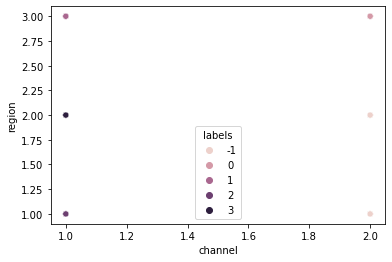

In [48]:
sns.scatterplot(df.channel, df.region, hue=df.labels)

In [49]:
from mpl_toolkits.mplot3d import Axes3D


In [ ]:
fig = plt.figure(1, figsize=(8, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

# plot the points
ax.scatter(df.Fresh, df.Milk, df.Grocery,
           c=df.labels, edgecolor='k')